# Predicting Customer Buying Behavior for British Airways

## Using Data to Understand Customer Purchase Decisions

In this project, we aim to predict whether a customer will make a booking for flights or holidays with British Airways. By leveraging customer booking data and using machine learning techniques, we can build a predictive model that helps identify potential customers. The goal is to provide insights into the factors that contribute to a successful booking and use this information to drive marketing efforts.


# Table of Contents
1. [Data Exploration](#data-exploration)  
2. [Data Preparation](#data-preparation)  
3. [Feature Engineering](#feature-engineering)  
4. [Model Training](#model-training)  
5. [Model Evaluation](#model-evaluation)  
6. [Feature Importance Visualization](#feature-importance)  
7. [Conclusions](#conclusions)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Customer_Booking.csv.csv to Customer_Booking.csv.csv


## Dataset Overview

The dataset provided contains information about customer bookings, with various features such as the number of passengers, sales channels, and booking preferences. Understanding and preparing this dataset is crucial for developing an accurate predictive model.


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from google.colab import files

# Step 2: Upload the dataset
uploaded = files.upload()

# Step 3: Load the dataset with the correct file name and encoding
# Use ISO-8859-1 encoding to handle special characters
df = pd.read_csv('Customer_Booking.csv.csv', encoding='ISO-8859-1')  # Ensure the file name matches exactly

# Step 4: Display the first few rows of the dataset
df.head()

# Step 5: Get basic information about the dataset
df.info()

# Step 6: Check for missing values
df.isnull().sum()

# Step 7: Get basic statistical summary
df.describe()


Saving Customer_Booking.csv.csv to Customer_Booking.csv (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


## Data Cleaning

Data cleaning is a critical step in ensuring that the model is built using the best possible version of the dataset. In this step, we check for missing values and correct any inconsistencies.


In [ ]:
# Get basic statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

# Get data types and basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Feature Engineering

Feature engineering transforms raw data into features that better represent the underlying problem to the predictive model. Here, we use one-hot encoding to convert categorical variables into numeric representations.


In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the updated dataframe
df.head()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False


## Splitting the Data

We divide the dataset into training and testing sets. This allows us to train the model on one portion of the data and test it on unseen data, ensuring that our model generalizes well to new inputs.


In [ ]:
# Define the target variable 'y' and the features 'X'
X = df.drop('booking_complete', axis=1)  # Features (all columns except the target)
y = df['booking_complete']  # Target (booking_complete column)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((40000, 918), (10000, 918), (40000,), (10000,))

## Model Training

We utilize a RandomForestClassifier to train the model. This algorithm is well-suited for classification tasks and provides feature importance, which will allow us to understand how different variables contribute to predicting customer bookings.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


## Model Evaluation

To evaluate the performance of the model, we use metrics such as accuracy, confusion matrix, and classification report. These metrics give us a detailed understanding of how well the model is performing across different classes.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.86
Confusion Matrix:
 [[8362  158]
 [1283  197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000



## Cross-Validation

Cross-validation helps to assess how the model performs across different subsets of the data, ensuring that our results are consistent and not dependent on a specific train-test split.


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.8497 0.7815 0.7255 0.5396 0.7818]
Mean Cross-Validation Score: 0.73562


## Feature Importance

The RandomForest model also allows us to determine which features contribute the most to predicting customer bookings. Understanding feature importance helps us refine our models and interpret the results.


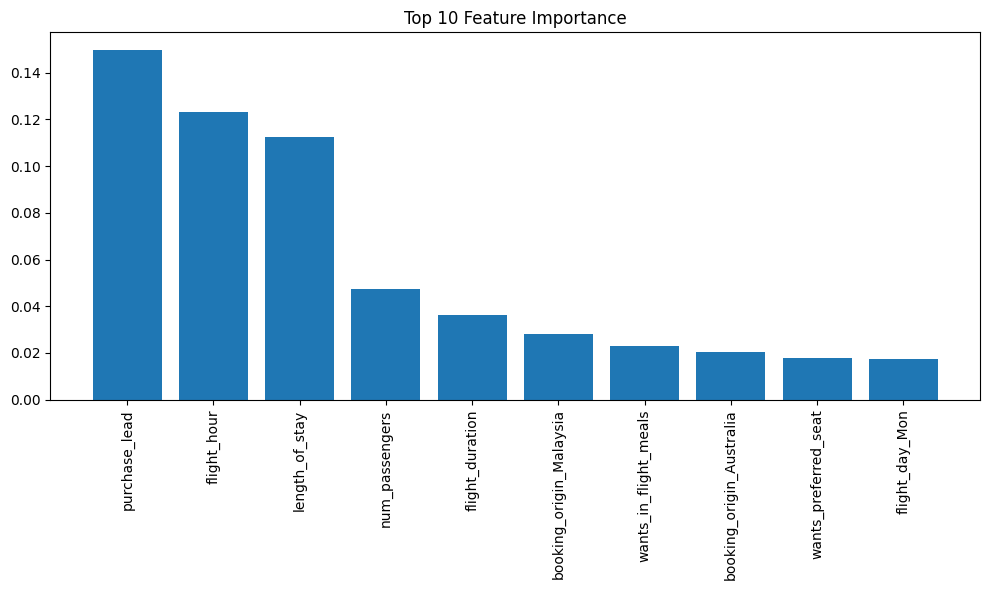

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the RandomForest model
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot only the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.tight_layout()
plt.show()


<a id="conclusions"></a>
# Conclusions

The predictive model shows that factors such as `purchase_lead`, `flight_hour`, and `length_of_stay` are among the most important in predicting whether a customer will complete a booking. These insights can help British Airways optimize their marketing strategies by focusing on the key drivers of customer behavior. Future improvements can be made by testing additional machine learning algorithms and exploring more advanced feature engineering techniques.
